# CH4 et CH5 - Mécanique

# Vecteurs vitesse et accélération - Tracé de l'évolution des énergies avec Python

Pour cette partie, on utilise le pointage effectué sur le lancer complet du ballon de basket pour étudier l'évolution des énergies au cours du temps.

## 1 - Importation des données

<div class="alert alert-info" role="alert">
  <strong>Travail à faire sur le notebook : </strong> <br>
    Pour les cellules de code suivantes, appuyez sur <strong>"shift + entrée"</strong> pour lancer le code Python contenu dans chaque cellule
</div>

In [18]:
import matplotlib.pyplot as plt # pour le tracé des graphiques

In [19]:
import csv 
import requests

On commence par importer les données stockées dans un fichier appelé basket.txt

In [20]:
CSV_URL="https://raw.githubusercontent.com/CDERYCKE/TS-vecteurs/main/basket-modele-1sur10.txt"
download = requests.get(CSV_URL)
decoded_content = download.content.decode('utf-8')
fichier_pointage = decoded_content.splitlines()

On range ensuite les données du fichier.csv dans des listes Python : x, y et t

In [21]:
# On crée 3 listes pour stocker les données du pointage

liste_t=[]
liste_x=[]
liste_y=[]

lire=csv.reader(fichier_pointage, delimiter=';')                            #chargement des lignes du fichier csv
for ligne in lire:                            #Pour chaque ligne... 
    liste_t.append( ligne[0] )
    liste_x.append( ligne[1] )
    liste_y.append( ligne[3] )
    
             

On convertit ensuite les données au format nombre avec float

In [22]:
t = [ float(liste_t[i]) for i in range(1,len(liste_t)) ]
x = [ float(liste_x[i]) for i in range(1,len(liste_x)) ]
y = [ float(liste_y[i]) for i in range(1,len(liste_y)) ]


In [23]:
len(t) # pour vérifier le nombre de points de pointage

31

On a ainsi récupéré 3 listes contenant les données.

On trace les graphiques $x(t)$ et $y(t)$ pour vérifier

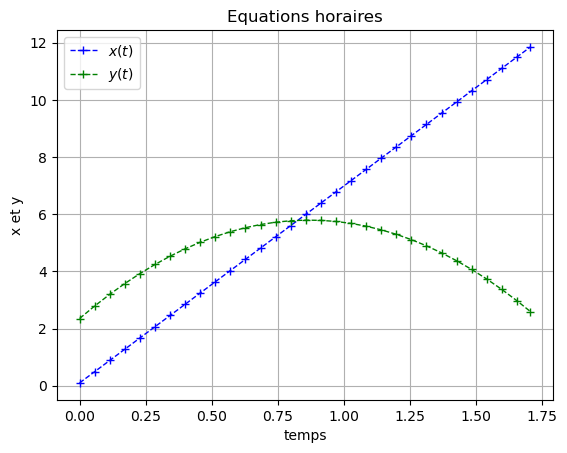

In [24]:
plt.close()

plt.plot(t, x, label='$x(t)$', color='blue', linestyle='dashed', linewidth=1,
marker='+', markerfacecolor='red')
plt.plot(t, y, label='$y(t)$', color='green', linestyle='dashed', linewidth=1,
marker='+', markerfacecolor='red')
plt.title('Equations horaires')  # Ajout d'un titre
plt.xlabel('temps')         # Nom de la grandeur en abscisse
plt.ylabel('x et y')         # Nom de la grandeur en ordonnée
plt.grid()              # Ajout d'une grille
plt.legend()

plt.show()  

On peut aussi tracer la trajectoire y en fonction de x : $y(x)$ 
Compléter la ligne suivante pour obtenir le graphique désiré :

<div class="alert alert-warning" role="alert">
    <strong> Travail à faire : </strong> <br>
    --> Modifier les lignes de code permettant de répondre au problème posé
</div>

In [25]:
plt.close() # pour fermer le graphique précedent

plt.plot(????,????, color='blue',marker='+')
plt.title('Trajectoire')  # Ajout d'un titre
plt.xlabel('x')         # Nom de la grandeur en abscisse
plt.ylabel('y')         # Nom de la grandeur en ordonnée
plt.grid()              # Ajout d'une grille

plt.show()  

SyntaxError: invalid syntax (3524803319.py, line 3)

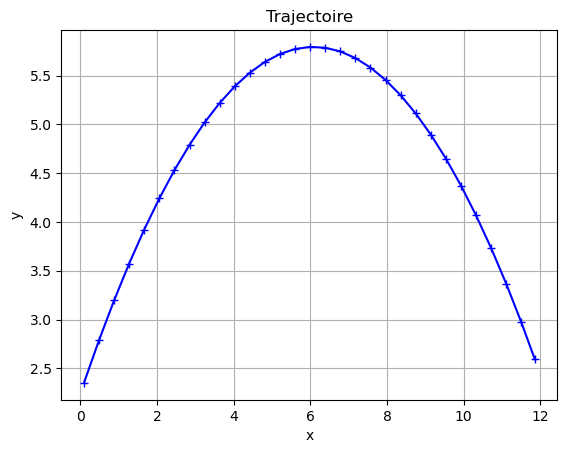

In [26]:
#correction

plt.close() # pour fermer le graphique précedent

plt.plot(x,y, color='blue',marker='+')
plt.title('Trajectoire')  # Ajout d'un titre
plt.xlabel('x')         # Nom de la grandeur en abscisse
plt.ylabel('y')         # Nom de la grandeur en ordonnée
plt.grid()              # Ajout d'une grille

plt.show()  

## 2 - Calculs de dérivées pour obtenir vitesse et accélération

On va alors calculer les valeurs des vitesses $v_x $ et $ v_y $ :  
Avec la méthode symétrique il s'agit de calculer la variation de position divisé par la durée.

On va utiliser la méthode symétrique, le code suivant est donc à modifier :

In [27]:
nb_points = len(t) # permet de connaitre le nombre de points de pointage

<div class="alert alert-warning" role="alert">
    <strong> Travail à faire : </strong> <br>
    --> Modifier les lignes de code suivantes pour obtenir le calcul de la vitesse par la méthode symétrique :  

In [28]:
Vx = []
Vy = []

for i in range(1,nb_points-1): # enlève le premier et le dernier pointage de la liste
    v_x = (x[i+1]-x[i]) / (t[i+1] - t[i])
    Vx.append(v_x)
    v_y = (y[i+1]-y[i]) / (t[i+1] - t[i])
    Vy.append(v_y)

In [29]:
# correction
Vx = []
Vy = []
for i in range(1,nb_points-1): # enlève le premier et le dernier pointage de la liste des positions
    v_x = (x[i+1]-x[i-1]) / (t[i+1] - t[i-1])
    Vx.append(v_x)
    v_y = (y[i+1]-y[i-1]) / (t[i+1] - t[i-1])
    Vy.append(v_y)

On peut tracer l'évolution des composantes du vecteurs vitesse en fonction du temps :

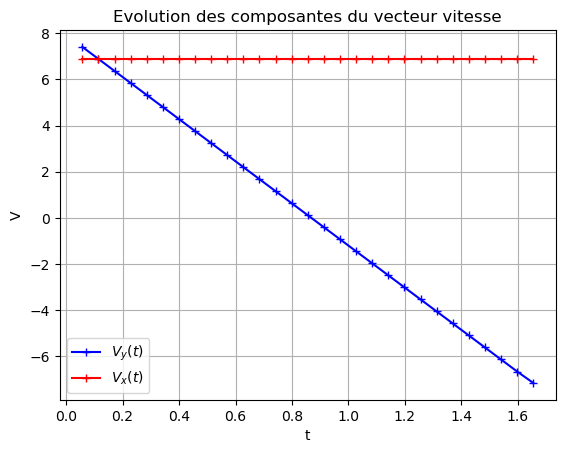

In [30]:
plt.close()

plt.plot(t[1:-1],Vy, color='blue',label='$V_y(t)$', marker='+')
plt.plot(t[1:-1],Vx, color='red',label='$V_x(t)$',marker='+')


plt.title('Evolution des composantes du vecteur vitesse')  # Ajout d'un titre
plt.xlabel('t')         # Nom de la grandeur en abscisse
plt.ylabel('V')         # Nom de la grandeur en ordonnée
plt.grid()              # Ajout d'une grille
plt.legend()

plt.show()  

## 3 - Tracé du vecteur vitesse :

On utilise une commande intégrée de Python : quiver  


<div class="alert alert-info" role="alert">
  <strong>Travail à faire sur le notebook : </strong> <br>
    Pour les cellules de code suivantes, appuyez sur <strong>shift + entrée</strong> pour lancer le code Python contenu dans chaque cellule
</div>

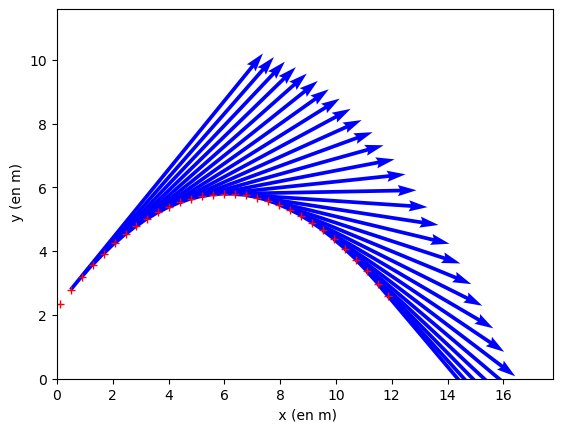

In [31]:
plt.close()

plt.xlim(0,1.5*max(x))
plt.ylim(0,2*max(y))
plt.plot(x,y,'r+') # on trace : la trajectoire ... 

plt.quiver(x[1:-1],y[1:-1],Vx,Vy, angles='xy', color='b',scale_units='xy', scale=1) # modifier scale pour l'échelle des vecteurs

plt.xlabel(" x (en m)")
plt.ylabel(" y (en m)")

# afficher le graphe
plt.show()

<div class="alert alert-warning" role="alert">
    <strong> Travail à faire : </strong> <br>
    --> Vérifier que les vecteurs vitesse sont tangent à la trajectoire  <br>
    --> Modifier si nécessaire l'échelle de tracé : scale

## 4 - Etude du vecteur accélération

On effectue un travail simmilaire pour l'accélération qui est la variation du vecteur vitesse.  
On travaille ici aussi avec la méthode symétrique.

On ne peut pas calculer l'accélération du premier point du pointage, ni celle du deuxième car il faut connaitre la vitesse avant.  
Même chose pour la fin de la liste.

In [32]:
ax = []
ay = []

for i in range(1,len(Vx)-1): # enlève le premier et le dernier pointage de la liste des vitesses
    a_x = (Vx[???]-Vx[????]) / (t[???] - t[???])
    ax.append(a_x)
    a_y = (Vy[???]-Vy[???]) / (t[???] - t[???])
    ay.append(a_y)

plt.plot(x,y,'r+') # la trajectoire, on dessine tous les points 

plt.quiver(x[2:-2],y[2:-2],ax,ay, angles='xy', color='b',scale_units='xy', scale=10) # on dessine les vecteurs uniquement entre le 2e pointage et l'avant dernier de la liste

# paramètres du graphe (taille, légendes)
plt.xlabel(" x (en m)")
plt.ylabel(" y (en m)")

# afficher le graphe
plt.show()

SyntaxError: invalid syntax (733149578.py, line 5)

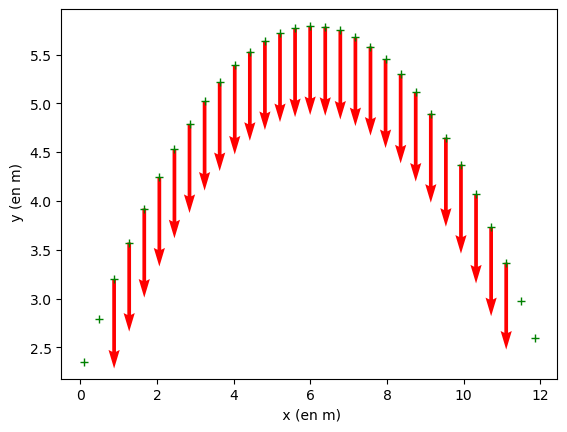

In [33]:
# correction
ax = []
ay = []

for i in range(1,len(Vx)-1):
    a_x = (Vx[i+1]-Vx[i-1]) / (t[i+1] - t[i-1])
    ax.append(a_x)
    a_y = (Vy[i+1]-Vy[i-1]) / (t[i+1] - t[i-1])
    ay.append(a_y)

plt.close()

plt.plot(x,y,'g+') #la trajectoire ... 

plt.quiver(x[2:-2],y[2:-2],ax,ay, angles='xy', color='r',scale_units='xy', scale=10)

# paramètres du graphe (taille, légendes)
plt.xlabel(" x (en m)")
plt.ylabel(" y (en m)")

# afficher le graphe
plt.show()

## 3 - Calcul des énergies

On va maintenant créer des listes contenant les valeurs des énergies en fonction du temps.

<div class="alert alert-warning" role="alert">
    <strong> Travail à faire sur la fiche réponse : </strong> <br>
    --> Répondre aux questions posées <br>
    --> Compléter le code Python ci-dessous <br>
</div>

On crée les variables contenant les données du problème :

In [34]:
# On crée les variables contenant les données du problème
m= 0.597# masse du ballon en kg
g = 9.8 # intensité de la pesanteur sur Terre

In [35]:
# Création des listes qui contiendront les valeurs des énergies
h=[] # on crée des listes vides
Ecin=[] 
Epp=[]
Emec=[]

In [41]:
# calcul des énergies potentielles de pesanteur :

for i in range(1,nb_points-1): # on n'utilise pas la totalité de la liste des positions
    hauteur=y[i]-y[0] # ainsi la référence des énergies potentiellles de pesanteur sera l'origine du repère
    h.append(hauteur)
    
    Epp_i= m*g*h[i]
    Epp.append(Epp_i)

On doit ensuite calculer les énergies cinétiques à partir des vitesses.  
On connait les listes des vitesses : `Vx` et `Vy` 

On va d'abord calculer la norme de la vitesse puis on pourra calculer la valeur de l'énergie cinétique pour chauqe point.


In [51]:
for i in range(0,nb_points-2): # il y a deux vitesses non calculables : la première et la dernière donc nb_points - 2 pour le nombre d'éléments de la liste
    
    vitesse = ( Vx[i]**2 + Vy[i]**2 )**(1/2)
    
    Ec_i= 1/2*m*(vitesse)**2
    Ecin.append(Ec_i)
    
   

Enfin on combine les listes pour obtenir l'énergie mécanique.  

In [53]:
for i in range(0,nb_points-2): # il y a deux énergies cinétiques  non calculées : la première et la dernière donc nb_points - 2 pour le nombre d'éléments de la liste    
    Emec_i= Ecin[i]+Epp[i]
    Emec.append(Emec_i)

*Remarque !*

Les indices des énergies et ceux des positions sont décalés !  
la liste des énergies commence au point $M_1$ tandis que celle des positions commence au point $M_0$ !!

Il nous reste à tracer l'évolution des énergies au cours du temps.

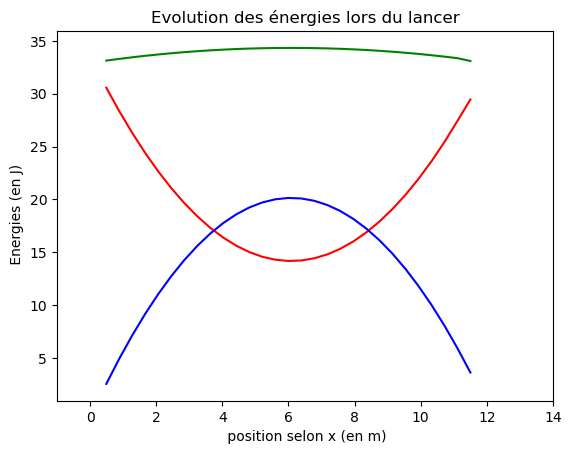

In [55]:

# Tracé du graphique
plt.xlim(-1,14)
plt.plot(x[1:-1],Ecin, 'r',label="Ecin") # x[1:-1] permet d'enlever la première et la dernière valeur de x pour lesquelles on n'a pas pu calculer Ecin
plt.plot(x[1:-1],Epp, 'b',label="Epp")
plt.plot(x[1:-1],Emec, 'g',label="Emec")


plt.title("Evolution des énergies lors du lancer")

plt.xlabel(" position selon x (en m)")
plt.ylabel(" Energies (en J)")

# afficher le graphe
plt.show()


On peut alors répondre aux questions du TP.

<div class="alert alert-success" role="alert">
 <strong> Le travail est terminé !</strong> <br>
</div>

**Compléments :**  
D’autres pointages sont disponibles, modifier le nom du fichier dans le code Python pour qu’il utilise ces pointages (chute = pointage1.txt et mouvement circulaire = pointage2.txt).